In [74]:
'''
RestWavelength_flux April 6, 2018
'''
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors
from matplotlib import gridspec
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table

In [77]:
##
## READ-IN THE DATA FILE(S)
## The Glikman et al. (2006) composites
##
path = '/cos_pc19a_npr/data/Glikman2006/'
file = 'Glikman_2006_ApJ_Table3.dat'
#file = 'Glikman_2006_ApJ_Table7.dat'
table = path+file
Glikman_comp = ascii.read(table)
Glik_wave = Glikman_comp['Wavelength']
Glik_flux = Glikman_comp['Flux']
Glik_nu   = ((Glik_wave*2)/3e8) * (Glik_flux)

In [78]:
Glik_wave = (Glik_wave/1e4)   ## Angs to microns 1e-10 --> 1e-6

In [79]:
c = 3e8  ## SoL, m/s
nu = c / Glik_wave

In [80]:
## e.g., Figure 7 of Glikman, Helfand & White, 2006, ApJ, 640, 579
alpha_nu = (-0.92)

In [81]:
alpha_lambda = ((-1.0)*(alpha_nu + 2.0))

In [82]:
f_nu = nu**(alpha_nu)

In [83]:
f_lambda = Glik_wave **((-1.0)*(alpha_nu + 2.0))

In [84]:
## Figure 7 of Glikman, Helfand & White, 2006, ApJ, 640, 579
power_law = f_lambda

/Users/npr1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


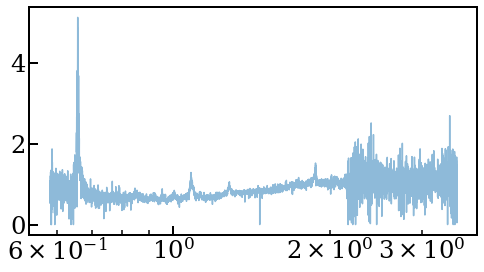

In [90]:
##
## Making the plot...
##
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(7, 4))

xmin =  0.50   ## um
xmax =  3.5    ## 4.0um in Ang
ymin =  1.0    ## mJy
ymax = 12.00 #1e8 # 50.00   ## mJy

#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
ax.set_xscale('log')
#ax.set_yscale('log')

comp_norm = 10.
## Plotting the Glikman et al. (2006) QSO composite
#ax.plot(((Glik_wave)), ((Glik_flux)), alpha=0.5)
ax.plot(((Glik_wave)), ((Glik_nu)*10000), alpha=0.5)
plt.show()


/Users/npr1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


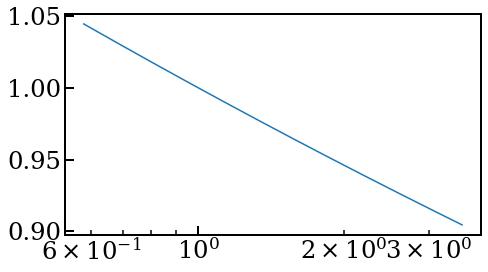

In [61]:
fig, ax = plt.subplots(figsize=(7, 4))

#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
ax.set_xscale('log')
ax.set_yscale('log')

comp_norm = 10.
ax.plot(Glik_wave, f_lambda*Glik_wave)
plt.show()


In [146]:
np.log10(3.4)

0.5314789170422551

In [147]:
## Just a baby test plot....
#waveleng_mu = (np.arange(3000)+1)/1000.
wavelength_mu = (np.logspace(-0.4,0.6,100))
wavelength_mu

array([0.39810717, 0.40747504, 0.41706334, 0.42687727, 0.43692213,
       0.44720335, 0.4577265 , 0.46849728, 0.4795215 , 0.49080513,
       0.50235427, 0.51417518, 0.52627425, 0.53865802, 0.55133319,
       0.56430663, 0.57758534, 0.59117651, 0.6050875 , 0.61932583,
       0.6338992 , 0.64881549, 0.66408279, 0.67970933, 0.69570359,
       0.7120742 , 0.72883004, 0.74598015, 0.76353383, 0.78150056,
       0.79989007, 0.8187123 , 0.83797743, 0.8576959 , 0.87787836,
       0.89853573, 0.9196792 , 0.94132019, 0.96347042, 0.98614186,
       1.00934679, 1.03309775, 1.05740759, 1.08228947, 1.10775685,
       1.1338235 , 1.16050353, 1.18781136, 1.21576178, 1.24436989,
       1.27365119, 1.3036215 , 1.33429705, 1.36569442, 1.39783061,
       1.43072299, 1.46438936, 1.49884794, 1.53411737, 1.57021671,
       1.60716552, 1.64498377, 1.68369191, 1.72331091, 1.76386217,
       1.80536765, 1.8478498 , 1.89133159, 1.93583656, 1.98138877,
       2.02801287, 2.07573409, 2.12457823, 2.17457173, 2.22574

In [153]:
alpha_nu      = -0.92
arbit_scale   = 1.
f_lambda_test = wavelength_mu**((alpha_nu  +2.0)*(-1.0))
f_nu_test     = ((wavelength_mu*wavelength_mu))*f_lambda_test * arbit_scale 

In [162]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter


/Users/npr1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


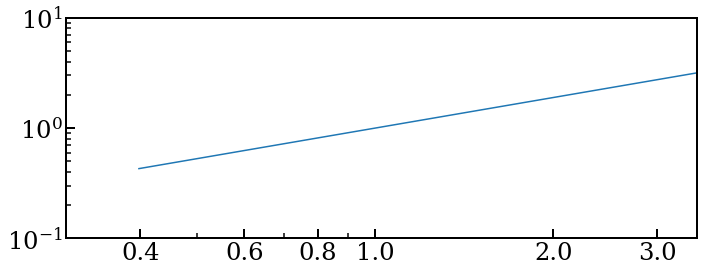

In [175]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_xscale('log')
ax.set_yscale('log')

ax.axis([0.30, 3.5, .1, 10])

ax.set_xticks([0.4,0.6,0.8, 1.0, 2.0, 3.0])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.plot(wavelength_mu, f_nu_test)